In [1]:
# Import required dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

letter_recognition = pd.read_csv('https://static.bc-edx.com/ai/ail-v-1-0/m13/lesson_3/datasets/letter-recognition.csv')

display(letter_recognition.head())
display(letter_recognition.info())
display(letter_recognition.describe())


,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   lettr   20000 non-null  object
 1   x-box   20000 non-null  int64 
 2   y-box   20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   high    20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   x-bar   20000 non-null  int64 
 7   y-bar   20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybr   20000 non-null  int64 
 12  xy2br   20000 non-null  int64 
 13  x-ege   20000 non-null  int64 
 14  xegvy   20000 non-null  int64 
 15  y-ege   20000 non-null  int64 
 16  yegvx   20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


None

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


<Axes: xlabel='lettr'>

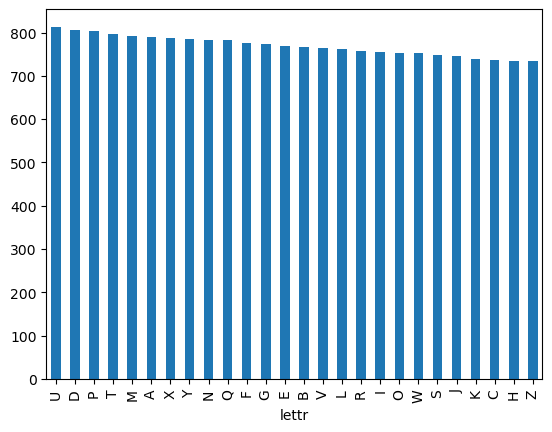

In [3]:
letter_recognition['lettr'].value_counts().plot(kind='bar')

In [4]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False, dtype='int')



In [5]:
y = letter_recognition['lettr']

In [6]:
X = letter_recognition.drop('lettr', axis=1)

In [7]:
X = ohe.fit_transform(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

y_train_encoded[:5]


array([22,  2,  8, 18, 25])

In [15]:
# logistic regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train_encoded)
y_pred = lr_model.predict(X_test)

display(accuracy_score(y_test_encoded, y_pred))

# display percision
from sklearn.metrics import precision_score
display(precision_score(y_test_encoded, y_pred, average='weighted'))

0.8555

0.8571951969898415

In [16]:
svm_model = SVC(kernel='linear').fit(X_train, y_train_encoded)
y_pred = svm_model.predict(X_test)

display(accuracy_score(y_test_encoded, y_pred))

# display percision
display(precision_score(y_test_encoded, y_pred, average='weighted'))


0.897

0.898710786043192

In [17]:
# decision tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train_encoded)

y_pred = dt_model.predict(X_test)

display(accuracy_score(y_test_encoded, y_pred))
display(precision_score(y_test_encoded, y_pred, average='weighted'))


0.76725

0.7697850331467471

In [18]:
# random forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train_encoded)

y_pred = rf_model.predict(X_test)

display(accuracy_score(y_test_encoded, y_pred))
display(precision_score(y_test_encoded, y_pred, average='weighted'))

0.90475

0.9072678289703391

In [19]:
# xgboost
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train_encoded)

y_pred = xgb_model.predict(X_test)

display(accuracy_score(y_test_encoded, y_pred))
display(precision_score(y_test_encoded, y_pred, average='weighted'))


0.91275

0.9134238896124228